In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [21]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [22]:
y.shape, tx.shape

((202,), (202, 2))

# Computing the Cost Function
Fill in the `compute_cost` function below:

In [23]:
def calculate_mse(e):
    """Calculate the mse for vector e."""
    return 1/2*np.mean(e**2)


def calculate_mae(e):
    """Calculate the mae for vector e."""
    return np.mean(np.abs(e))


def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    e = y - tx.dot(w)
    return calculate_mse(e)

# Grid Search

Fill in the function `grid_search()` below:

In [24]:
# from costs import *

def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    loss = np.zeros((len(w0), len(w1)))
    # compute loss for each combinationof w0 and w1.
    for ind_row, row in enumerate(w0):
        for ind_col, col in enumerate(w1):
            w = np.array([row, col])
            loss[ind_row, ind_col] = compute_loss(y, tx, w)
    return loss

Let us play with the grid search demo now!

Grid Search: loss*=66.92119404701603, w0*=72.72727272727272, w1*=10.606060606060595, execution time=0.159 seconds


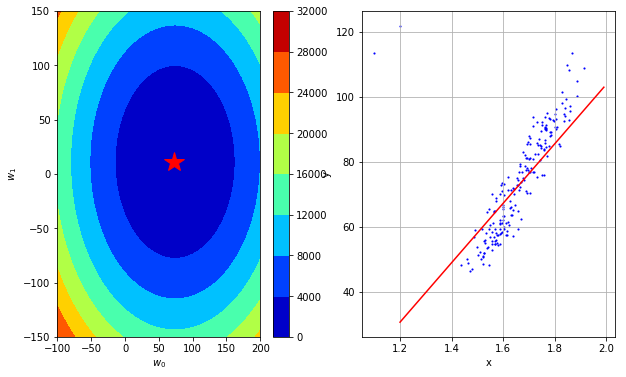

In [25]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [28]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    err = y - tx.dot(w)
    grad = -tx.T.dot(err) / len(err)
    return grad, err

Please fill in the functions `gradient_descent` below:

In [30]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad, err = compute_gradient(y, tx, w)
        loss = calculate_mse(err)
        # gradient w by descent update
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [31]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.5

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2869.8351145358524, w0=37.03390292746316, w1=5.517447432994586
Gradient Descent(1/49): loss=766.9068262109164, w0=55.550854391194754, w1=8.27617114949186
Gradient Descent(2/49): loss=241.17475412968173, w0=64.80933012306056, w1=9.655533007740491
Gradient Descent(3/49): loss=109.74173610937295, w0=69.43856798899347, w1=10.345213936864802
Gradient Descent(4/49): loss=76.88348160429572, w0=71.75318692195992, w1=10.690054401426956
Gradient Descent(5/49): loss=68.66891797802646, w0=72.91049638844315, w1=10.86247463370803
Gradient Descent(6/49): loss=66.61527707145913, w0=73.48915112168476, w1=10.948684749848567
Gradient Descent(7/49): loss=66.10186684481731, w0=73.77847848830557, w1=10.991789807918835
Gradient Descent(8/49): loss=65.97351428815686, w0=73.92314217161596, w1=11.013342336953968
Gradient Descent(9/49): loss=65.94142614899174, w0=73.99547401327116, w1=11.024118601471535
Gradient Descent(10/49): loss=65.93340411420047, w0=74.03163993409876, w1=11.0295

In [32]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_figure>

# Stochastic gradient descent

In [12]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    err = y - tx.dot(w)
    grad = -tx.T.dot(err) / len(err)
    return grad, err

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y, tx, batch_size=batch_size, num_batches=1):
            # compute a stochastic gradient and loss
            grad, _ = compute_stoch_gradient(y_batch, tx_batch, w)
            # update w through the stochastic gradient update
            w = w - gamma * grad
            # calculate loss
            loss = compute_loss(y, tx, w)
            # store w and loss
            ws.append(w)
            losses.append(loss)

        print("SGD({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [15]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 10

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD(0/49): loss=274.86427997003835, w0=51.67293563361437, w1=6.304077783200217
SGD(1/49): loss=32.55058595109821, w0=70.52885381367581, w1=18.645348318195825
SGD(2/49): loss=15.484954840672325, w0=72.8522171701227, w1=13.424659868389742
SGD(3/49): loss=15.593071103272194, w0=72.70987660302478, w1=13.209051317170845
SGD(4/49): loss=15.932553847727581, w0=72.30058229754238, w1=13.153203339961932
SGD(5/49): loss=18.11419281582531, w0=72.50529274992041, w1=11.28092326897283
SGD(6/49): loss=15.967000034973655, w0=72.27516213312514, w1=13.127075707400657
SGD(7/49): loss=16.53721454641346, w0=72.93626813117022, w1=12.005013461037633
SGD(8/49): loss=16.044925530866244, w0=72.19673329556687, w1=13.81772466304961
SGD(9/49): loss=16.689918594693413, w0=71.90914515584701, w1=14.31064837583845
SGD(10/49): loss=15.937666918209155, w0=73.15714004729621, w1=12.438151685153429
SGD(11/49): loss=16.19891675182785, w0=72.80891346038487, w1=12.300380216971059
SGD(12/49): loss=18.713078611227218, w0=75.6388

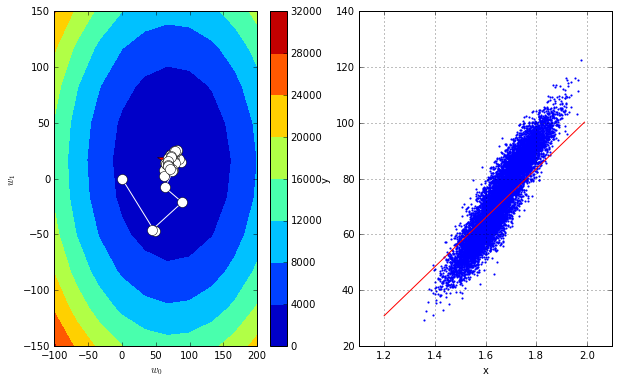

In [87]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))